### Importing the libraries

In [533]:
import pandas as pd
import numpy as np;
import scipy;
## plotting libraries
from matplotlib import pyplot as plt
import seaborn as sns
## stats Libraries
from scipy import stats
import statsmodels.api as sm
## Sklearn libraries
from sklearn import model_selection
from sklearn import metrics as metrics
from sklearn import preprocessing
from sklearn import linear_model as lm
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

### 1- Checking the Data

#### Reading the data

In [534]:
data = pd.read_csv("loan_train.csv")
data

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


#### Checking the datatypes of the columns

In [535]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


#### Checking the null data

In [536]:
data.isna().sum()

Unnamed: 0.1      0
Unnamed: 0        0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

### 2- Data Cleaning

#### Dropping the unnecessary columns

In [537]:
data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True) 
data

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


#### Making the column names lowercase

In [538]:
data= data.rename(columns=str.lower)
data

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


#### Checking the unique values in the columns

In [539]:
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION'], dtype=object)

In [540]:
data['principal'].unique()

array([1000,  800,  300,  900,  500], dtype=int64)

In [541]:
data['terms'].unique()

array([30, 15,  7], dtype=int64)

In [542]:
data['effective_date'].unique()

array(['9/8/2016', '9/9/2016', '9/10/2016', '9/11/2016', '9/12/2016',
       '9/13/2016', '9/14/2016'], dtype=object)

In [543]:
data['due_date'].unique()

array(['10/7/2016', '9/22/2016', '10/8/2016', '9/24/2016', '9/16/2016',
       '10/9/2016', '10/10/2016', '9/25/2016', '9/17/2016', '11/9/2016',
       '10/25/2016', '9/26/2016', '10/11/2016', '11/10/2016', '9/18/2016',
       '10/26/2016', '9/19/2016', '10/12/2016', '9/27/2016', '9/28/2016',
       '10/13/2016', '11/12/2016', '9/23/2016'], dtype=object)

In [544]:
data['age'].unique()

array([45, 33, 27, 28, 29, 36, 26, 39, 40, 32, 25, 34, 31, 37, 21, 30, 24,
       35, 22, 50, 44, 43, 46, 38, 23, 20, 47, 42, 19, 51, 41, 18],
      dtype=int64)

In [545]:
data['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

In [546]:
data['gender'].unique()

array(['male', 'female'], dtype=object)

The loan_status and education columns are the ones we need to clean.

In [547]:
data['education']=data['education'].str.lower()
data

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,high school or below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,high school or below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,high school or below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


Correct the typo. Bechalor/bachelor

In [548]:
data.loc[:, 'education'][(data['education'] == 'bechalor')] = 'bachelor'
data

C:\Users\isikh\AppData\Local\Temp\ipykernel_17436\2055765981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'education'][(data['education'] == 'bechalor')] = 'bachelor'


,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,high school or below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,bachelor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,high school or below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,high school or below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


Lowercase all the values in column loan_status

In [549]:
data['loan_status']=data['loan_status'].str.lower()
data

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,paidoff,1000,30,9/8/2016,10/7/2016,45,high school or below,male
1,paidoff,1000,30,9/8/2016,10/7/2016,33,bachelor,female
2,paidoff,1000,15,9/8/2016,9/22/2016,27,college,male
3,paidoff,1000,30,9/9/2016,10/8/2016,28,college,female
4,paidoff,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,collection,800,15,9/11/2016,9/25/2016,32,high school or below,male
342,collection,1000,30,9/11/2016,10/10/2016,25,high school or below,male
343,collection,800,15,9/12/2016,9/26/2016,39,college,male
344,collection,1000,30,9/12/2016,11/10/2016,28,college,male


The data is clean and ready. Let's check what the data says

In [550]:
data

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,paidoff,1000,30,9/8/2016,10/7/2016,45,high school or below,male
1,paidoff,1000,30,9/8/2016,10/7/2016,33,bachelor,female
2,paidoff,1000,15,9/8/2016,9/22/2016,27,college,male
3,paidoff,1000,30,9/9/2016,10/8/2016,28,college,female
4,paidoff,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,collection,800,15,9/11/2016,9/25/2016,32,high school or below,male
342,collection,1000,30,9/11/2016,10/10/2016,25,high school or below,male
343,collection,800,15,9/12/2016,9/26/2016,39,college,male
344,collection,1000,30,9/12/2016,11/10/2016,28,college,male


Checking the education

<AxesSubplot:xlabel='education', ylabel='count'>

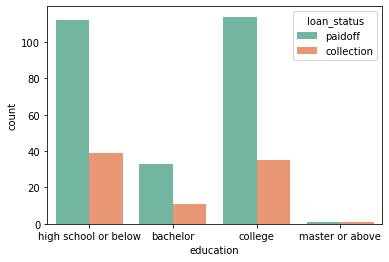

In [551]:
### palette="Set1", Set2 changes the colors of the graphs
sns.countplot(x='education', hue='loan_status',palette="Set2", data=data)

Checking the gender

<AxesSubplot:xlabel='gender', ylabel='count'>

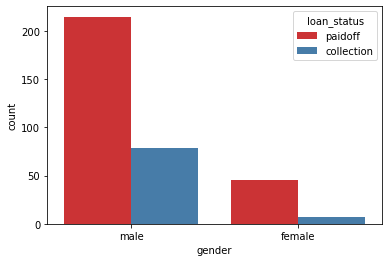

In [552]:
sns.countplot(x='gender', hue='loan_status', palette="Set1", data=data)

<AxesSubplot:xlabel='age', ylabel='count'>

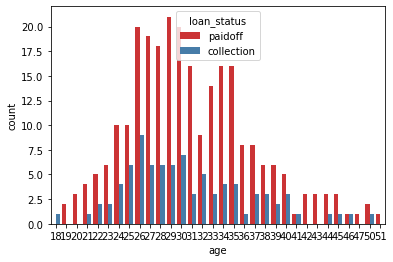

In [553]:
sns.countplot(x='age', hue='loan_status', palette="Set1", data=data)

<AxesSubplot:xlabel='principal', ylabel='count'>

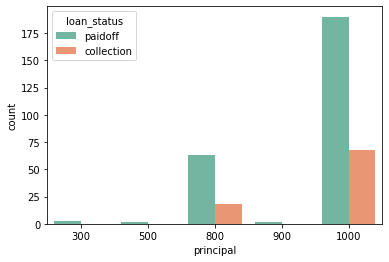

In [554]:
sns.countplot(x='principal', hue='loan_status', palette="Set2", data=data)

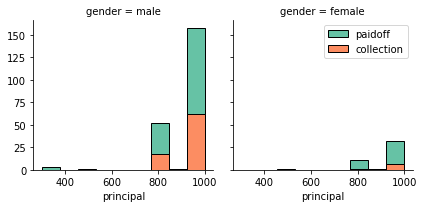

In [555]:
bins = np.linspace(data.principal.min(), data.principal.max(), 10)
g = sns.FacetGrid(data, col="gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Converting the date to the day of the week with using dt.dayofweek function

In [556]:
data['due_date'] = pd.to_datetime(data['due_date']) #convert it to proper date in python
data['effective_date'] = pd.to_datetime(data['effective_date'])
data['dayofweek_effective'] = data['effective_date'].dt.dayofweek
data['due_date_effective'] = data['due_date'].dt.dayofweek
data

,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek_effective,due_date_effective
0,paidoff,1000,30,2016-09-08,2016-10-07,45,high school or below,male,3,4
1,paidoff,1000,30,2016-09-08,2016-10-07,33,bachelor,female,3,4
2,paidoff,1000,15,2016-09-08,2016-09-22,27,college,male,3,3
3,paidoff,1000,30,2016-09-09,2016-10-08,28,college,female,4,5
4,paidoff,1000,30,2016-09-09,2016-10-08,29,college,male,4,5
...,...,...,...,...,...,...,...,...,...,...
341,collection,800,15,2016-09-11,2016-09-25,32,high school or below,male,6,6
342,collection,1000,30,2016-09-11,2016-10-10,25,high school or below,male,6,0
343,collection,800,15,2016-09-12,2016-09-26,39,college,male,0,0
344,collection,1000,30,2016-09-12,2016-11-10,28,college,male,0,3


Also checking the effective date

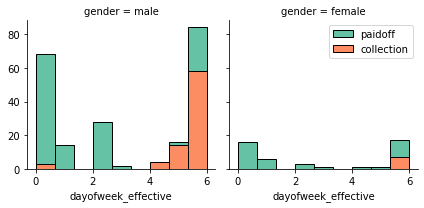

In [557]:
bins=np.linspace(data.dayofweek_effective.min(), data.dayofweek_effective.max(), 10)
g = sns.FacetGrid(data, col="gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek_effective', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

### 3- Converting the categorical data to numerical 

For the classification we need to convert the categorical values to numerical

In [558]:
#first, start with gender
data['gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
data.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek_effective,due_date_effective
0,paidoff,1000,30,2016-09-08,2016-10-07,45,high school or below,0,3,4
1,paidoff,1000,30,2016-09-08,2016-10-07,33,bachelor,1,3,4
2,paidoff,1000,15,2016-09-08,2016-09-22,27,college,0,3,3
3,paidoff,1000,30,2016-09-09,2016-10-08,28,college,1,4,5
4,paidoff,1000,30,2016-09-09,2016-10-08,29,college,0,4,5


In [559]:
data['education'].replace(to_replace=['high school or below', 'bachelor', 'college', 'master or above'], value=[0,1,2,3],inplace=True)
data

,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek_effective,due_date_effective
0,paidoff,1000,30,2016-09-08,2016-10-07,45,0,0,3,4
1,paidoff,1000,30,2016-09-08,2016-10-07,33,1,1,3,4
2,paidoff,1000,15,2016-09-08,2016-09-22,27,2,0,3,3
3,paidoff,1000,30,2016-09-09,2016-10-08,28,2,1,4,5
4,paidoff,1000,30,2016-09-09,2016-10-08,29,2,0,4,5
...,...,...,...,...,...,...,...,...,...,...
341,collection,800,15,2016-09-11,2016-09-25,32,0,0,6,6
342,collection,1000,30,2016-09-11,2016-10-10,25,0,0,6,0
343,collection,800,15,2016-09-12,2016-09-26,39,2,0,0,0
344,collection,1000,30,2016-09-12,2016-11-10,28,2,0,0,3


Let's drop the due date and effective date

In [560]:
data.drop(['effective_date', 'due_date'], axis = 1, inplace = True) 
data

,loan_status,principal,terms,age,education,gender,dayofweek_effective,due_date_effective
0,paidoff,1000,30,45,0,0,3,4
1,paidoff,1000,30,33,1,1,3,4
2,paidoff,1000,15,27,2,0,3,3
3,paidoff,1000,30,28,2,1,4,5
4,paidoff,1000,30,29,2,0,4,5
...,...,...,...,...,...,...,...,...
341,collection,800,15,32,0,0,6,6
342,collection,1000,30,25,0,0,6,0
343,collection,800,15,39,2,0,0,0
344,collection,1000,30,28,2,0,0,3


#### Let's split the data to X and Y

In [561]:
X=data[['principal', 'terms', 'age', 'education', 'gender', 'dayofweek_effective','due_date_effective']]

y =data[['loan_status']]
X

,principal,terms,age,education,gender,dayofweek_effective,due_date_effective
0,1000,30,45,0,0,3,4
1,1000,30,33,1,1,3,4
2,1000,15,27,2,0,3,3
3,1000,30,28,2,1,4,5
4,1000,30,29,2,0,4,5
...,...,...,...,...,...,...,...
341,800,15,32,0,0,6,6
342,1000,30,25,0,0,6,0
343,800,15,39,2,0,0,0
344,1000,30,28,2,0,0,3


### 4- Logistic Regression

Let's put everything in one part. we are going to get also the matrix for train and test set to see the result. 
I did not convert the loan_status to dummy variables because I wanted to keep them as paidoff or collection. I added them as pos_label(See below)

C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.771739,0.742857
1,Precision,0.768657,0.769231
2,Recall,0.995169,0.943396


C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for the train set
[[  7  62]
 [  1 206]]


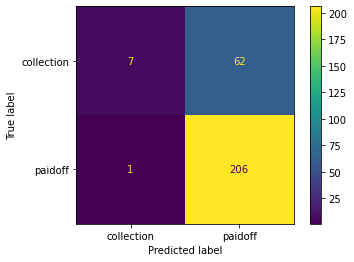



Confusion matrix for the test set
[[ 2 15]
 [ 3 50]]


C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


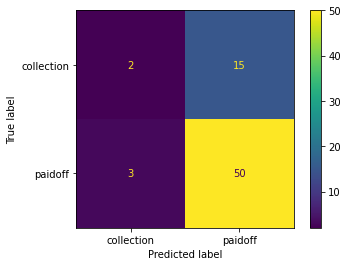

In [562]:
log_model = LogisticRegression() 

## Data splitting to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label ='paidoff'), #not converting to dummy
                                         recall_score(y_train, y_pred_train_log, pos_label ='paidoff')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label ='paidoff'),
                                        recall_score(y_test, y_pred_test_log, pos_label ='paidoff')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

#### Checking the F1 score, Jaccard similarity and log loss

In [563]:
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

F1_log = 2*((precision_score(y_test, y_pred_test_log, pos_label ='paidoff'))*(recall_score(y_test, y_pred_test_log, pos_label ='paidoff')))/((precision_score(y_test, y_pred_test_log, pos_label ='paidoff'))+(recall_score(y_test, y_pred_test_log, pos_label ='paidoff')))
F1_log

0.847457627118644

### 5- KNN

In [564]:
model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
model.fit(X_train, y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


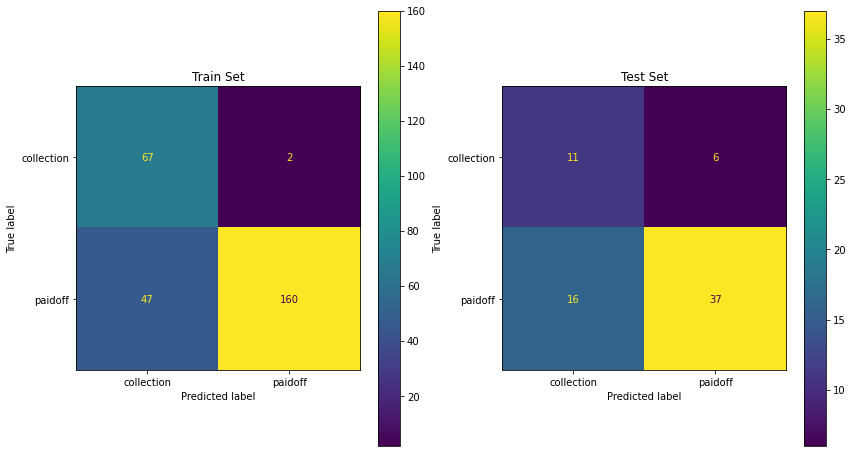

In [565]:
# Let's see the confucion matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model, X_train, y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model, X_test, y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [566]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train, pos_label ='paidoff'),
                                         recall_score(y_train, y_pred_train, pos_label ='paidoff')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test, pos_label ='paidoff'),
                                        recall_score(y_test, y_pred_test, pos_label ='paidoff')]})
    
    return performance_df   #, df_train, df_test
evaluate_classification_model(y_train, y_pred_train, y_test, y_pred)

,Error_metric,Train,Test
0,Accuracy,0.822464,0.685714
1,Precision,0.987654,0.860465
2,Recall,0.772947,0.698113


In [567]:
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

F1_knn = 2*((precision_score(y_test, y_pred_test, pos_label ='paidoff'))*(recall_score(y_test, y_pred_test, pos_label ='paidoff')))/((precision_score(y_test, y_pred_test, pos_label ='paidoff'))+(recall_score(y_test, y_pred_test, pos_label ='paidoff')))
F1_knn

0.7708333333333334

Recall does not really good

### 6- Decision Tree

In [568]:
# I wanted to split the data again since here we do not have to normalize the data

X1=data[['principal', 'terms', 'age', 'education', 'gender', 'dayofweek_effective','due_date_effective']]
y1 =data[['loan_status']]
X1

,principal,terms,age,education,gender,dayofweek_effective,due_date_effective
0,1000,30,45,0,0,3,4
1,1000,30,33,1,1,3,4
2,1000,15,27,2,0,3,3
3,1000,30,28,2,1,4,5
4,1000,30,29,2,0,4,5
...,...,...,...,...,...,...,...
341,800,15,32,0,0,6,6
342,1000,30,25,0,0,6,0
343,800,15,39,2,0,0,0
344,1000,30,28,2,0,0,3


In [569]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=11)

In [570]:
data1 = DecisionTreeClassifier(max_features=None, random_state=None, max_depth=4, min_samples_split=2, min_samples_leaf=1)

,Error_metric,Train,Test
0,Accuracy,0.789256,0.711538
1,Precision,0.786957,0.737374
2,Recall,0.989071,0.948052


Confusion matrix for the train set
[[ 10   2]
 [ 49 181]]


C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


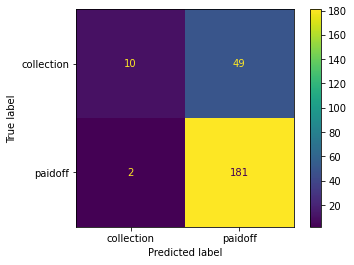



Confusion matrix for the test set
[[ 1  4]
 [26 73]]


C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


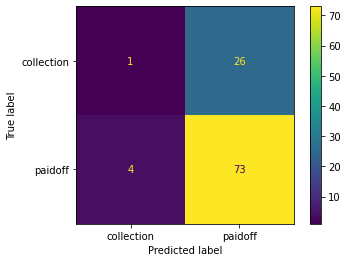

In [571]:
data1.fit(X1_train, y1_train)

y1_pred_train_dt = data1.predict(X1_train)
y1_pred_test_dt = data1.predict(X1_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y1_train, y1_pred_train_dt),
                                         precision_score(y1_train, y1_pred_train_dt, pos_label = 'paidoff'),
                                         recall_score(y1_train, y1_pred_train_dt, pos_label = 'paidoff')],
                               'Test': [accuracy_score(y1_test, y1_pred_test_dt),
                                        precision_score(y1_test, y1_pred_test_dt, pos_label = 'paidoff'),
                                        recall_score(y1_test, y1_pred_test_dt, pos_label = 'paidoff')]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y1_train,y1_pred_train_dt).T)
plot_confusion_matrix(data1, X1_train,y1_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y1_test,y1_pred_test_dt).T)
plot_confusion_matrix(data1, X1_test,y1_test, values_format = 'd')
plt.show()

In [572]:
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

F1_tree = 2*((precision_score(y1_test, y1_pred_test_dt, pos_label ='paidoff'))*(recall_score(y1_test, y1_pred_test_dt, pos_label ='paidoff')))/((precision_score(y1_test, y1_pred_test_dt, pos_label ='paidoff'))+(recall_score(y1_test, y1_pred_test_dt, pos_label ='paidoff')))
F1_tree

0.8295454545454545

#### Let's see the the tree :)

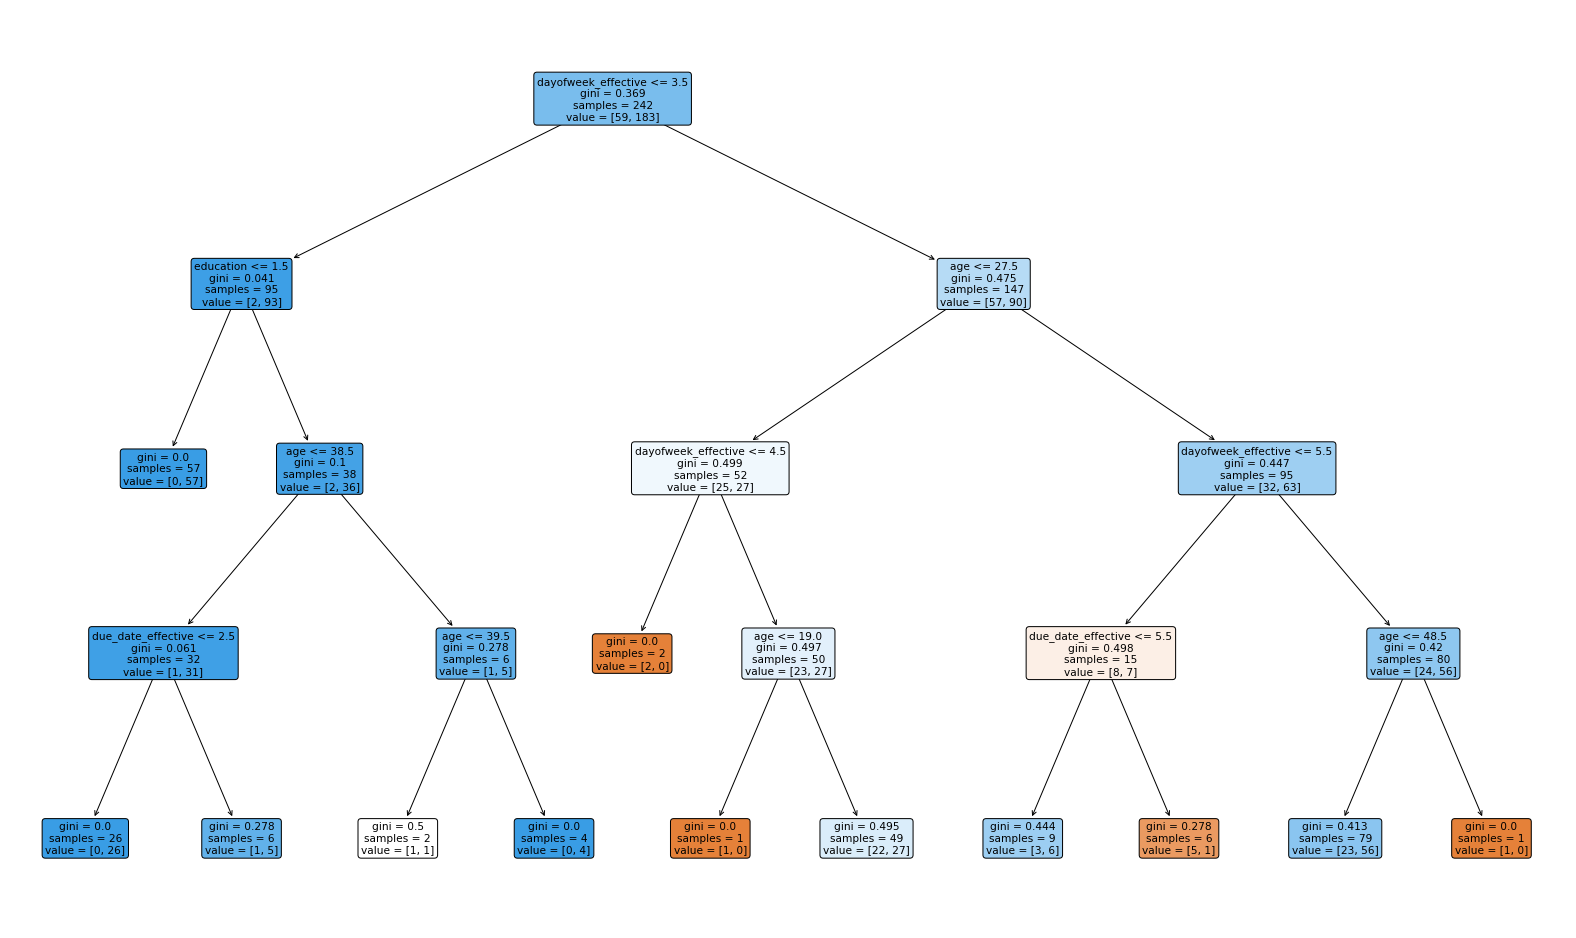

In [573]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (28,17))

plot_tree(data1,filled = True, rounded=True,feature_names=X1.columns)
plt.show()

### 7- Support Vector Machine

In [574]:
# First time trying support Vector machine :)
# Let's split the X and Y

In [575]:
X2=data[['principal', 'terms', 'age', 'education', 'gender', 'dayofweek_effective','due_date_effective']]
y2=data[['loan_status']]

In [576]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=11)

In [577]:
SVM_type = svm.SVC()
SVM_type.fit(X2_train, y2_train)

C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [578]:
test = SVM_type.predict(X2_test)
test

array(['paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff', 'paidoff',
       'paidoff', 'paidoff', 'paidoff', 'paidoff', 

In [580]:
#from sklearn.metrics import jaccard_similarity_score
print("Support Vector Machine F1-score: %.2f" % f1_score(y2_test, test, average='weighted'))
print("Support Vector Machine Jaccard index: %.2f" % sklearn.metrics import jaccard_similarity_score(y2_test, test))

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\metrics\__init__.py)